In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
con = pd.read_csv("dataset82/connections.csv", sep='\t')
proc = pd.read_csv("dataset82/processes.csv", sep='\t')
dev = pd.read_csv("dataset82/devices.csv", sep='\t')
prof = pd.read_csv("dataset82/profiles.csv", sep='\t')

# 1.1 Základný opis dát spolu s ich charakteristikami

## A

### First look at data

In [3]:
# con.head()
# proc.head()
# dev.head()
# prof.head()

### DataFrame information (rows, columns, types, ...)

In [4]:
# con.info()
# proc.info()
# dev.info()
# prof.info()

# .dtypes
# .columns
# .shape

### Important DataFrame values

In [5]:
# con.describe()
# proc.describe()
# dev.describe()
# prof.describe()

## B

In [6]:
#prof['UserID'].value_counts()
#prof['Username'].value_counts()

In [7]:
# con['Chrome'].plot(kind="kde")

In [8]:
attributes =  pd.DataFrame()
attributes['c.dogalize'] = con['c.dogalize']
attributes['c.katana'] = con['c.katana']
attributes['c.android.gm'] = con['c.android.gm']
attributes['p.android.packageinstaller'] = proc['p.android.packageinstaller']
attributes['p.android.externalstorage'] = proc['p.android.externalstorage']
attributes['p.system'] = proc['p.system']
attributes['p.android.chrome'] = proc['p.android.chrome']
attributes['p.android.settings'] = proc['p.android.settings']
attributes['p.android.documentsui'] = proc['p.android.documentsui']
attributes['p.android.gm'] = proc['p.android.gm']

In [9]:
pom = attributes.describe()

In [10]:
temp = attributes.mode().mean()
temp = pd.DataFrame({'mode': temp})
temp = temp.T
pom2 = pd.concat([pom, temp])

In [11]:
temp =attributes.median()
temp = pd.DataFrame({'median': temp})
temp = temp.T
pom3 = pd.concat([pom2, temp])
pom3

c.dogalize      c.katana  c.android.gm  p.android.packageinstaller  \
count   15163.000000  15163.000000  15163.000000                15163.000000   
mean       10.020399     11.203841     10.586978                   11.124513   
std         2.577396      2.435685      2.644261                    2.740620   
min         1.345990      3.114230      0.352680                    1.251080   
25%         8.153405      9.417735      8.643630                    9.098235   
50%         9.850370     11.426240     10.677230                   11.002760   
75%        11.809825     12.933545     12.504850                   13.110320   
max        19.978530     19.779240     19.863010                   22.171880   
mode       11.703833     10.797297     10.158184                   13.147093   
median      9.850370     11.426240     10.677230                   11.002760   

        p.android.externalstorage      p.system  p.android.chrome  \
count                15163.000000  15163.000000      15163.000000   
mean                     9.400444      9.949135         11.757776   
std                      2.327835      2.606072          2.306645   
min                      1.339600      1.830330          0.000000   
25%                      7.839450      8.083575         10.351225   
50%                      9.178270      9.775220         11.966780   
75%                     10.784935     11.735265         13.356430   
max                     18.809410     19.326580         20.313310   
mode                     8.882380      8.642943         12.572603   
median                   9.178270      9.775220         11.966780   

        p.android.settings  p.android.documentsui  p.android.gm  
count         15163.000000           15163.000000  15163.000000  
mean              9.947951              10.022634     11.223905  
std               2.483041               2.626337      2.650640  
min               1.191610               1.098620      1.396170  
25%               8.144540               8.113970      9.322810  
50%               9.887110               9.974390     11.330850  
75%              11.839975              11.931550     13.120465  
max              18.379140              18.743220     20.901430  
mode             10.857756              10.614303     11.772417  
median            9.887110               9.974390     11.330850

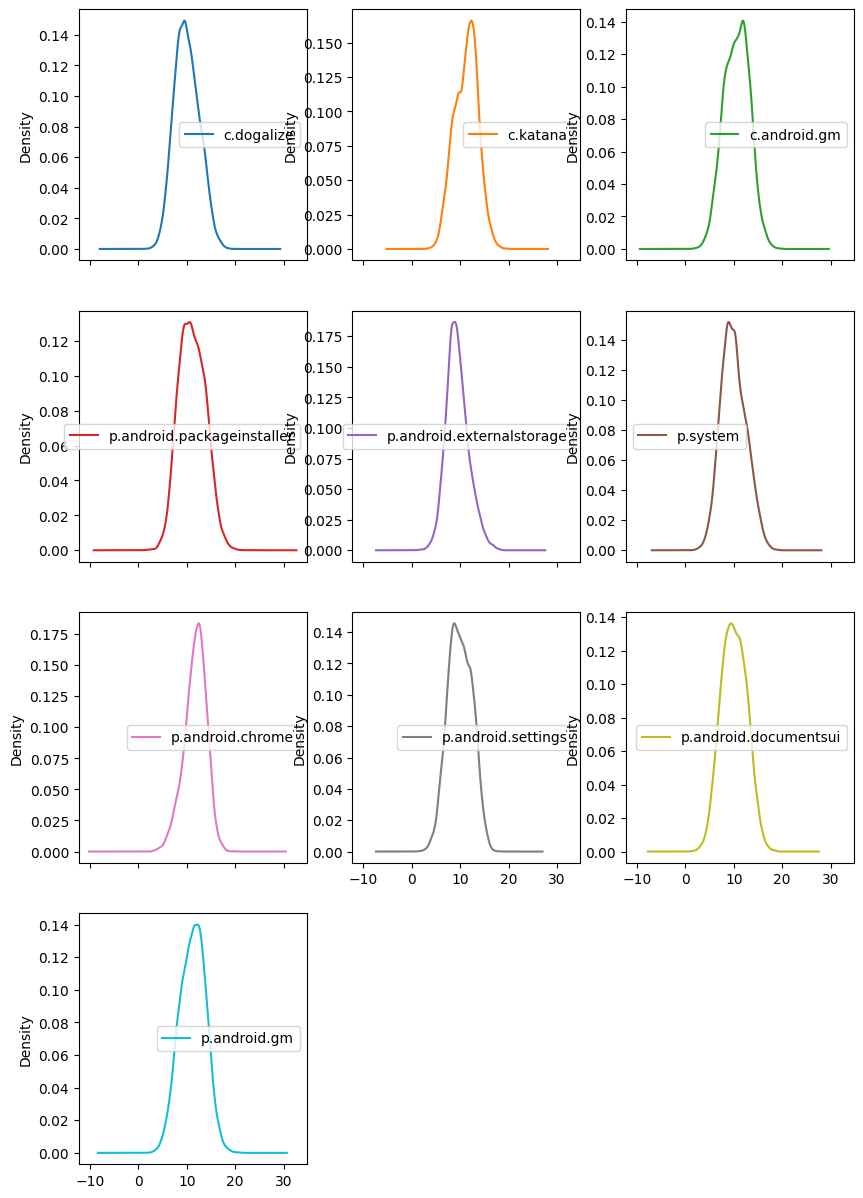

In [12]:
attributes.plot(kind='kde', subplots=True, layout=(4, 3), figsize=(10, 15))
plt.show()

<Axes: >

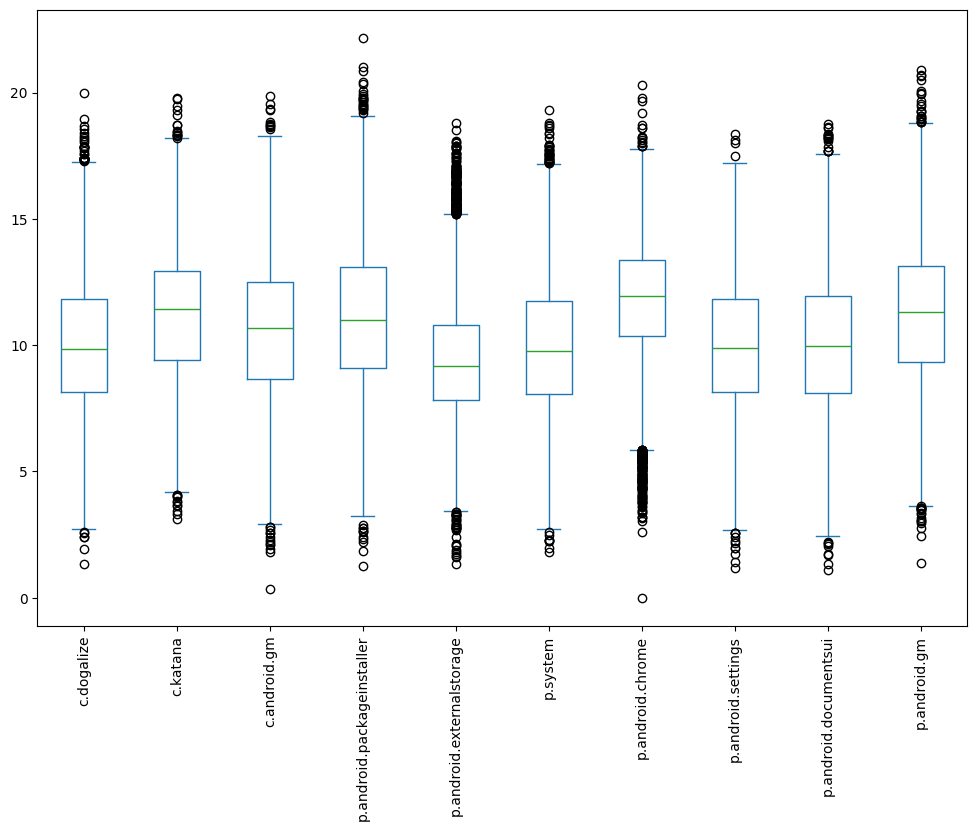

In [13]:
attributes.plot(kind='box', figsize=(12, 8), rot=90)

## C

In [14]:
# con.plot(kind="scatter", x="Chrome", y="Malware")
# plt.show()

In [15]:
# sns.scatterplot(data=con, x='ID', y='Chrome', hue='DateTime')
# plt.show()

<Axes: >

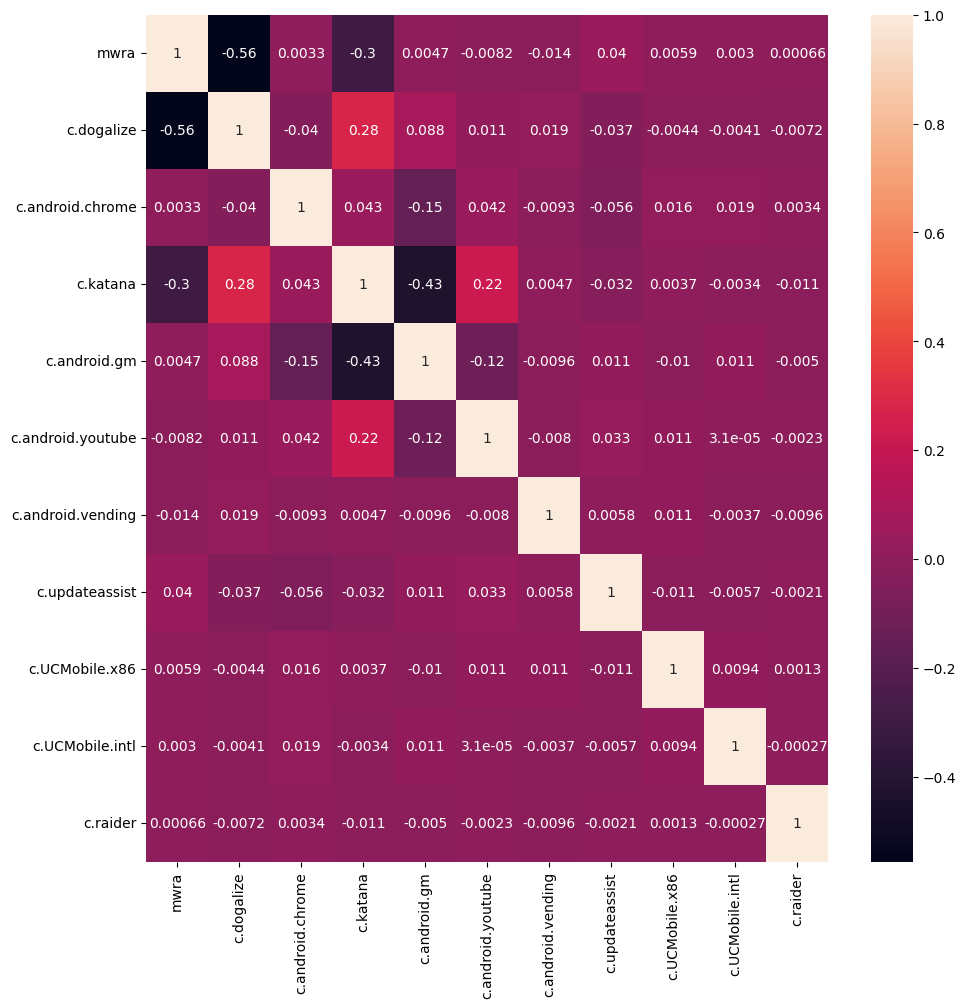

In [16]:
con2=con[[#'ts', 'imei', 
    'mwra', 
        'c.dogalize', 'c.android.chrome', 'c.katana',
       'c.android.gm', 'c.android.youtube', 'c.android.vending',
       'c.updateassist', 'c.UCMobile.x86', 'c.UCMobile.intl', 'c.raider']].copy()

con_corr2=con2.corr()

fig, ax = plt.subplots(figsize=(11,11))

sns.heatmap(con_corr2, annot=True)

<Axes: >

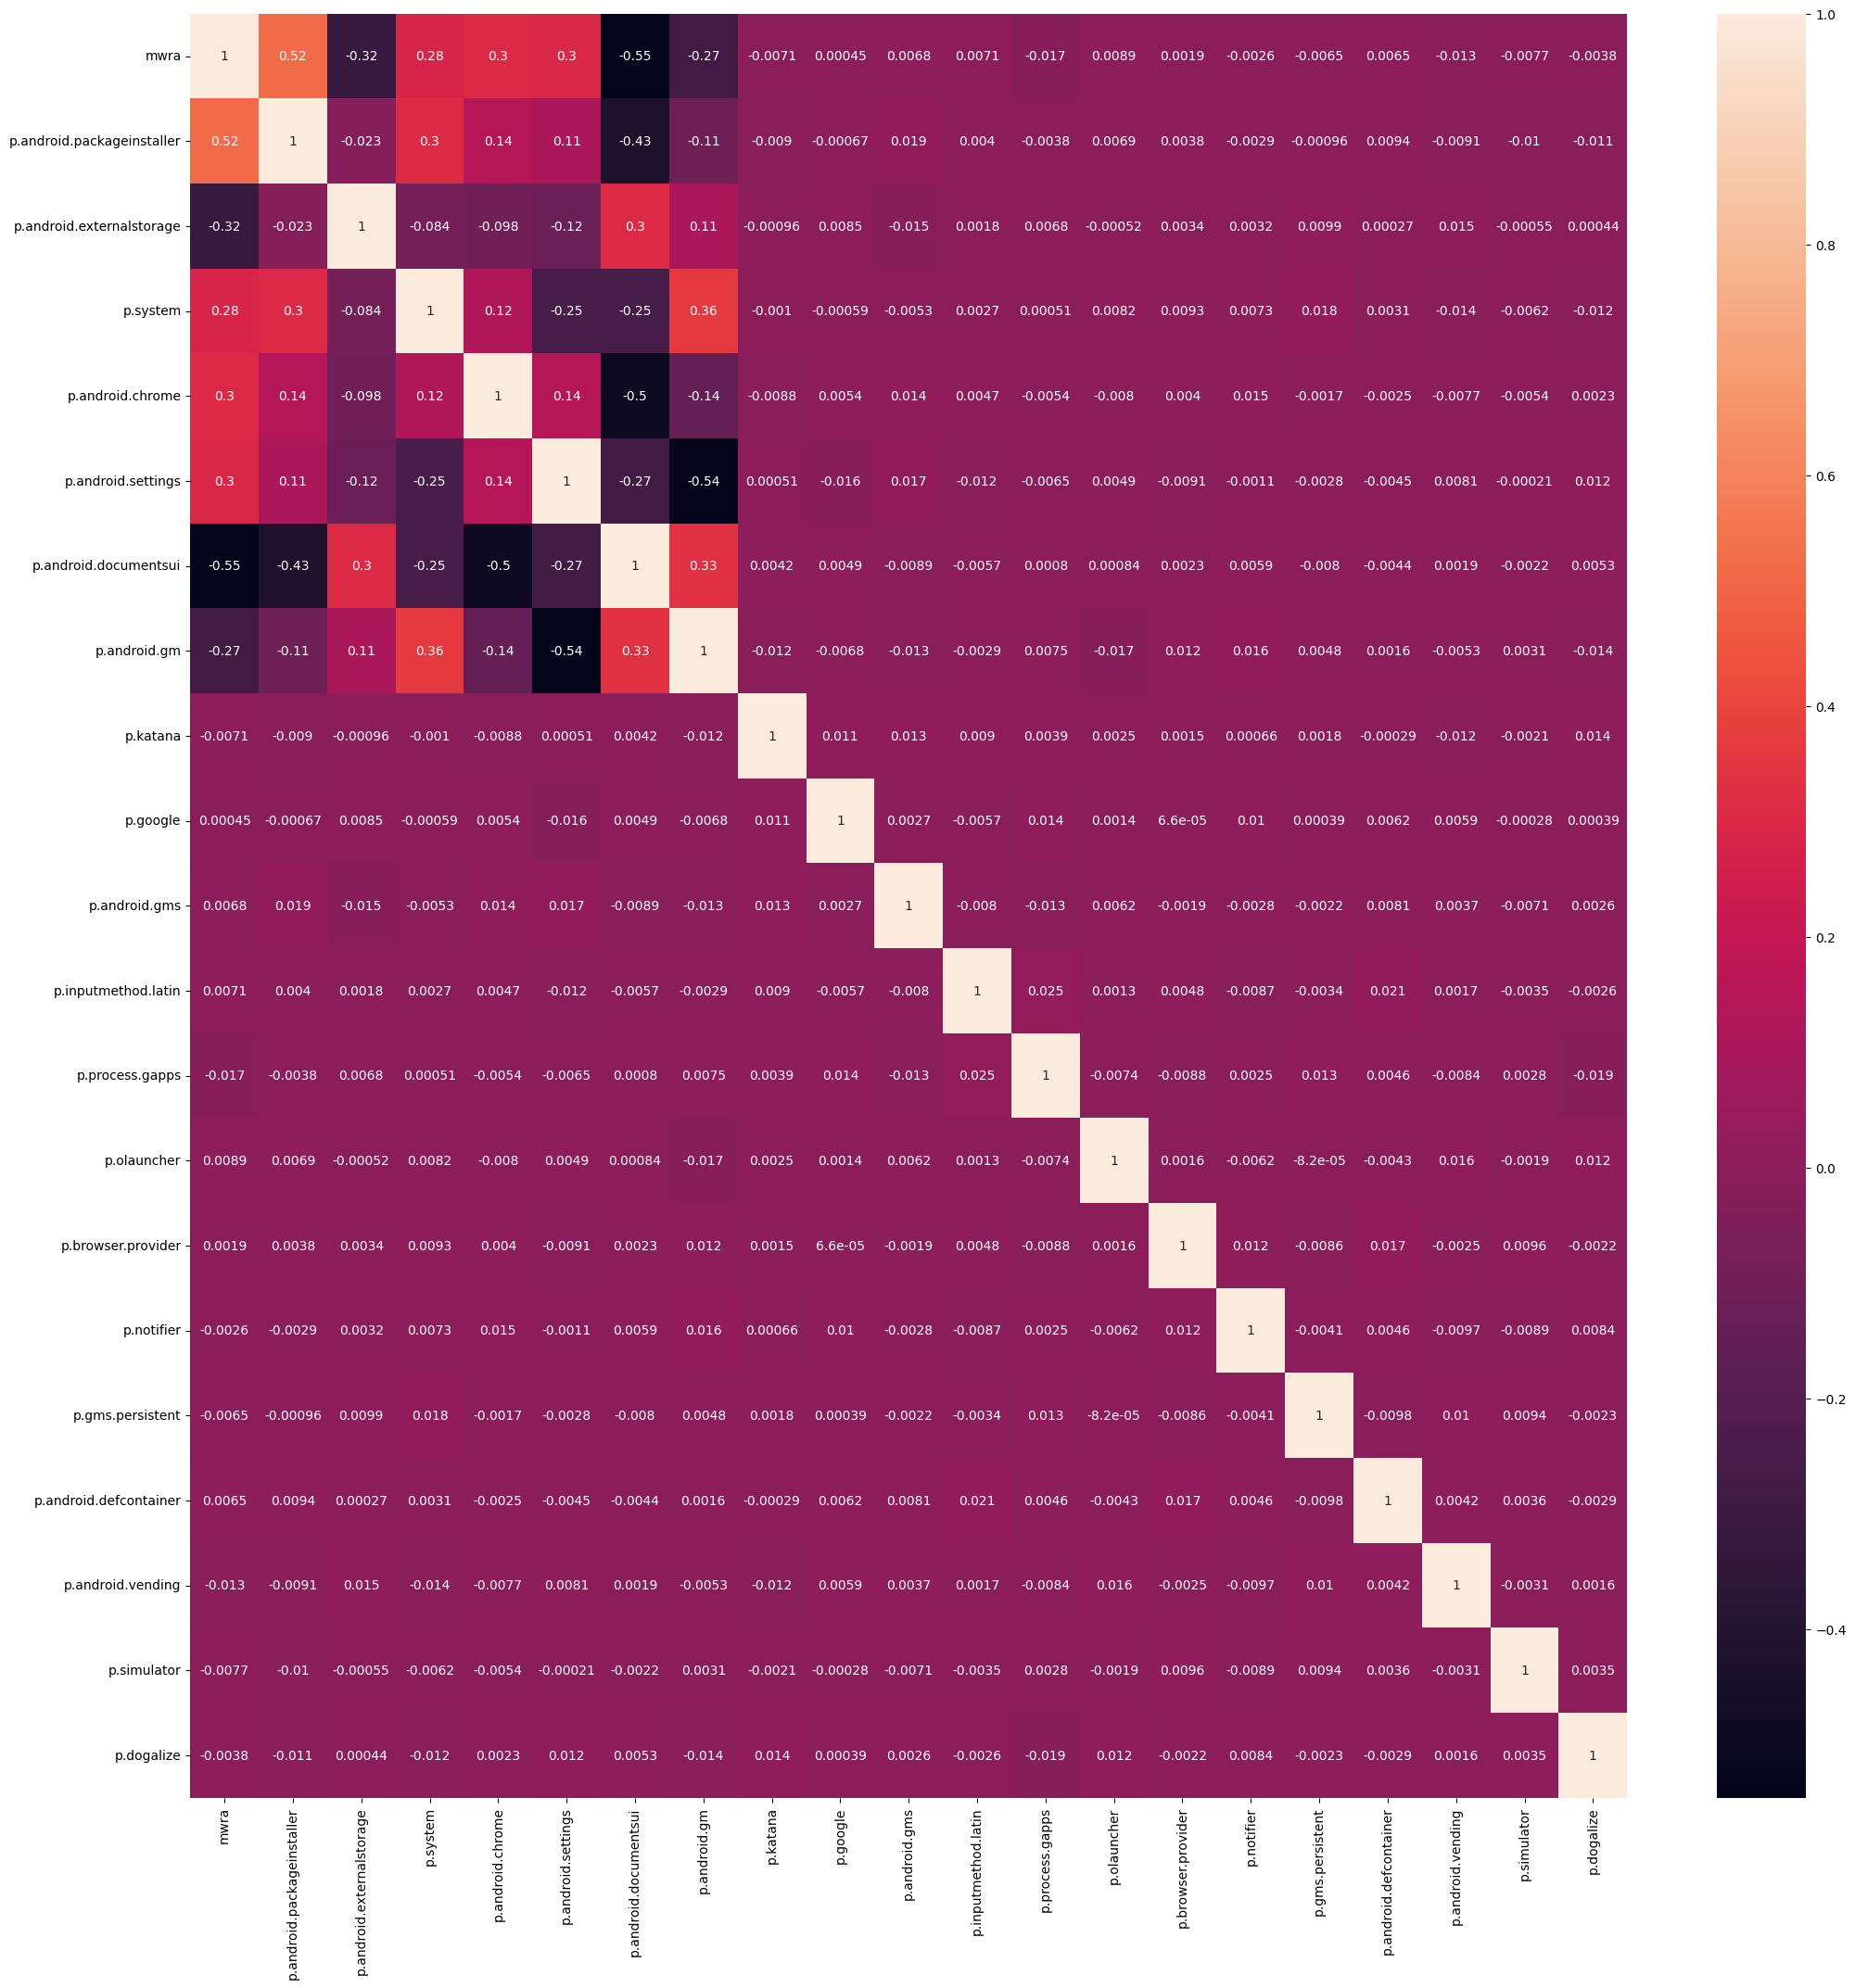

In [17]:
proc2 = proc[[#'ts', 'imei', 
        'mwra', 
        'p.android.packageinstaller',
       'p.android.externalstorage', 'p.system', 'p.android.chrome',
       'p.android.settings', 'p.android.documentsui', 'p.android.gm',
       'p.katana', 'p.google', 'p.android.gms', 'p.inputmethod.latin',
       'p.process.gapps', 'p.olauncher', 'p.browser.provider', 'p.notifier',
       'p.gms.persistent', 'p.android.defcontainer', 'p.android.vending',
       'p.simulator', 'p.dogalize']].copy()

proc_corr1=proc2.corr()

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(proc_corr1, annot=True)

In [18]:
con_proc = pd.merge(con, proc, on=['ts', 'imei', 'mwra'])

pd.set_option('display.max_columns', None) 
con_proc.head()

ts                 imei  mwra  c.dogalize  \
0  2018-05-05 10:00:00   359043379931766007   1.0     8.77752   
1  2018-05-05 10:01:00  3590433799317662089   0.0    14.22336   
2  2018-05-05 10:02:00   863033069630348974   1.0     8.54406   
3  2018-05-05 10:03:00  8630330696303482303   0.0     8.45038   
4  2018-05-05 10:04:00  3590433799317661214   1.0     8.43303   

   c.android.chrome  c.katana  c.android.gm  c.android.youtube  \
0          11.38049  12.34407       9.92776            5.45121   
1          10.57120  11.62779      12.58529           10.95140   
2          10.56842  11.75027       7.99912           13.79062   
3          12.20856  12.93420       8.91733           13.61598   
4          12.91601   6.59161      13.28375           11.84398   

   c.android.vending  c.updateassist  c.UCMobile.x86  c.UCMobile.intl  \
0           38.91961         0.00350         3.07943         64.98245   
1           59.10202         0.00018        86.13880         68.26242   
2           67.85473         0.15281        89.57752         11.52702   
3           57.52227         0.09174        77.12259         83.83905   
4           61.12345         0.00431        77.10114         53.79920   

   c.raider  p.android.packageinstaller  p.android.externalstorage  p.system  \
0   1.40681                    11.90416                   11.19779   7.60383   
1  45.71979                     8.74523                    7.65554   9.49404   
2  94.70739                    15.68790                   11.98031  12.67268   
3  37.76103                    15.17766                    3.39842  10.01515   
4  35.20326                    12.11010                    6.01721   7.15878   

   p.android.chrome  p.android.settings  p.android.documentsui  p.android.gm  \
0           9.18353             8.55184               11.19148       8.30220   
1           8.20213             6.32215               12.33170      11.65786   
2          11.29634            11.47538               10.38642       9.07927   
3           5.53874             3.57674                9.83642      13.01602   
4          15.25489            13.88784                7.34559       7.38960   

   p.katana  p.google  p.android.gms  p.inputmethod.latin  p.process.gapps  \
0  71.02059  35.24565       52.07074             66.53657         22.62795   
1  49.94224  33.98371       40.80957             46.12881          1.75228   
2  40.91094  36.75758       45.25943             58.32725         26.62538   
3  43.79368  24.11398       34.80335             63.78355         95.12515   
4  45.92319  40.94376       53.10769             48.84318         65.04820   

   p.olauncher  p.browser.provider  p.notifier  p.gms.persistent  \
0     68.82046             5.34638    60.71954          91.44208   
1     63.95436            92.52467     3.56652          54.81245   
2     59.50626            25.68333    95.57546          70.33923   
3     36.75006            82.01474    30.62274          81.77126   
4     50.38813             0.89319    56.53053          71.65832   

   p.android.defcontainer  p.android.vending  p.simulator  p.dogalize  
0                32.74843           72.98707     91.50713    38.12265  
1                47.19235           34.25583     64.09818    74.40462  
2                 9.74088           51.66399      6.16361    79.52068  
3                27.99291           33.84844     16.02638    53.70138  
4                19.58884           98.09707     93.80860    27.96079

<Axes: >

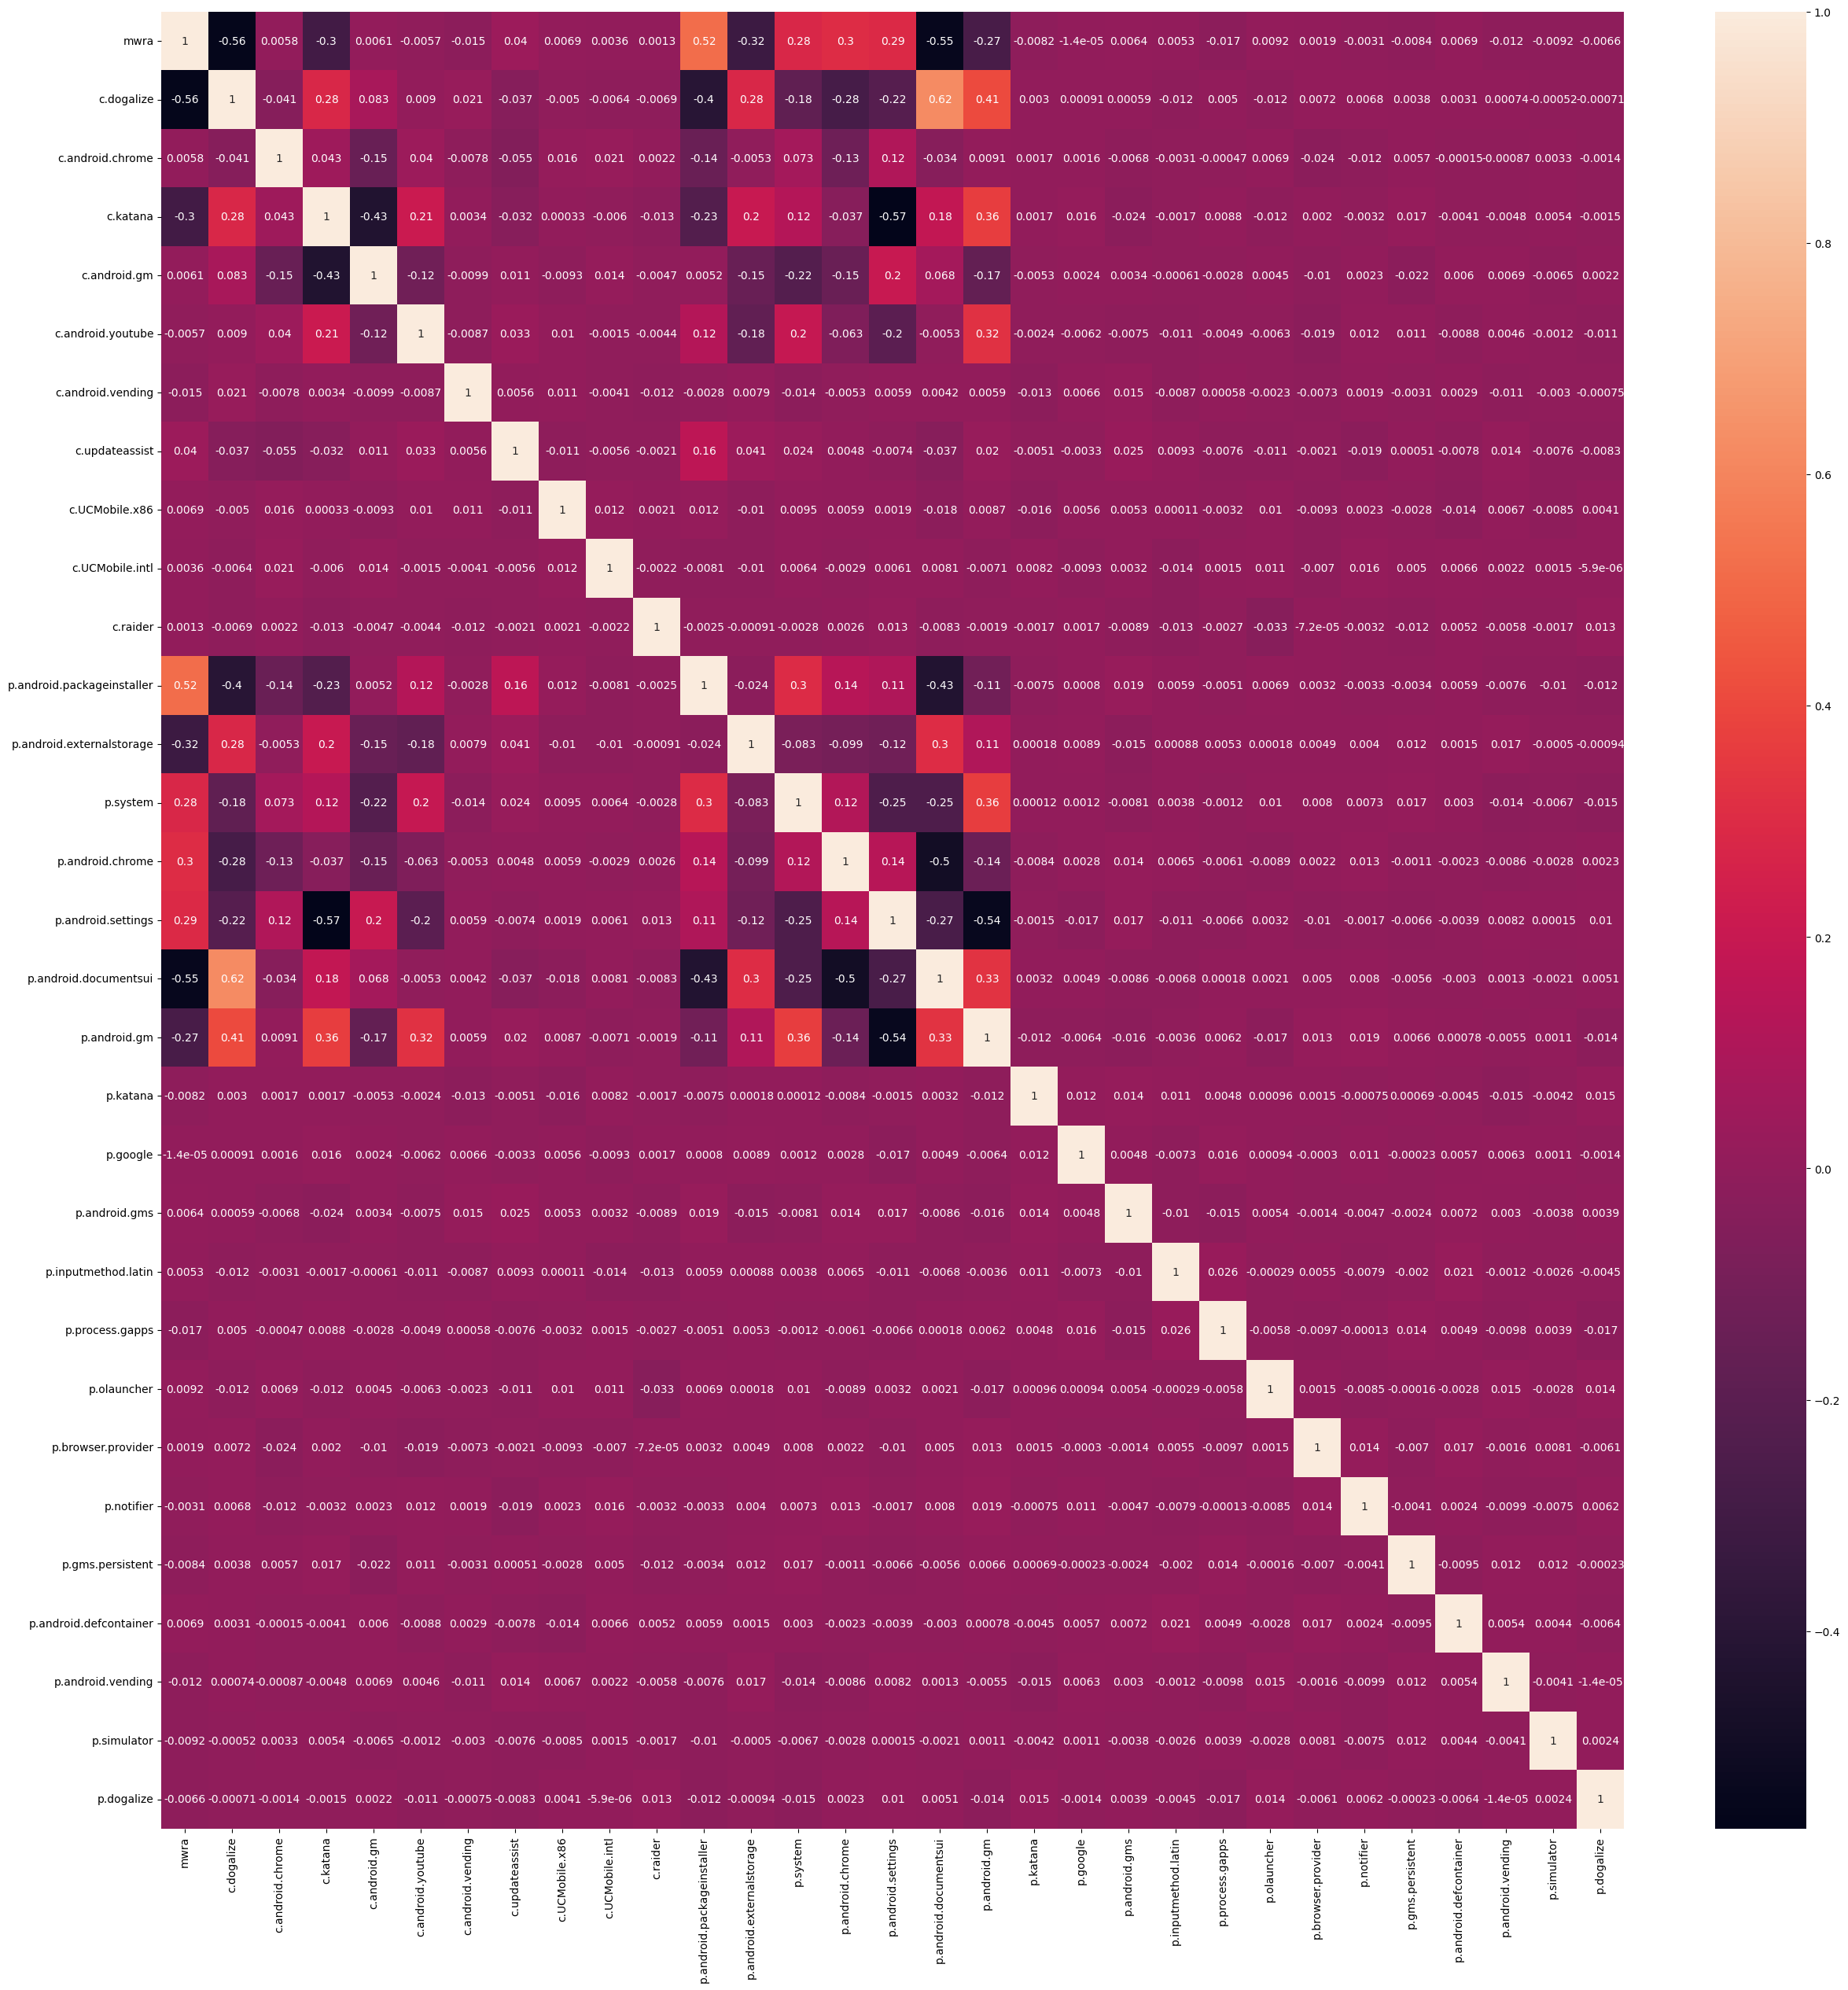

In [19]:
con_proc_corr=con_proc.drop(columns=['ts', 'imei']).corr()

fig, ax = plt.subplots(figsize=(30,30))

sns.heatmap(con_proc_corr, annot=True)

## D

In [20]:
mwra_corr = con_proc_corr['mwra'].drop('mwra').sort_values(ascending=False)

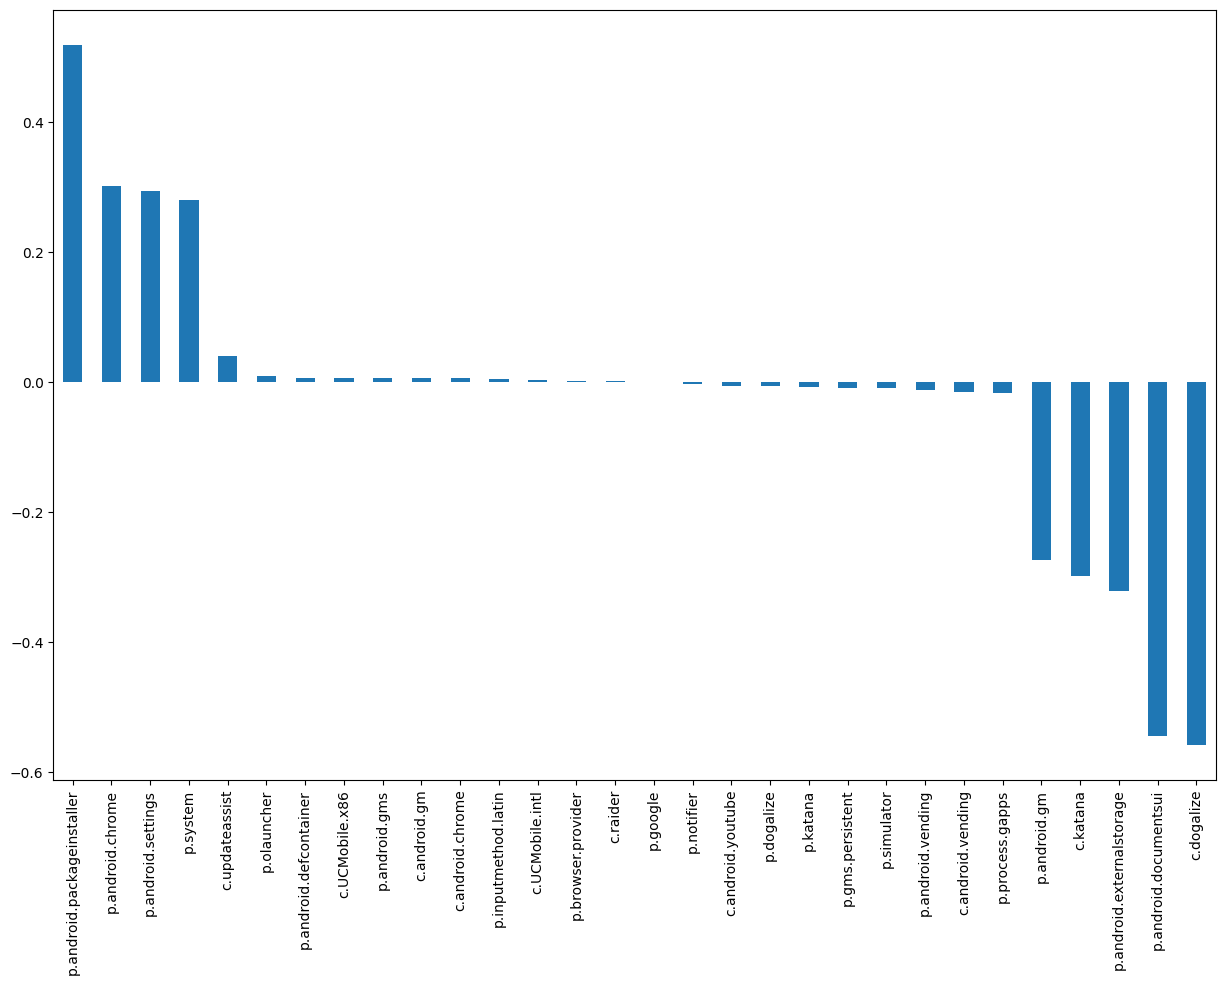

In [21]:
mwra_corr.plot(kind='bar', figsize=(15, 10))
plt.show()

[]

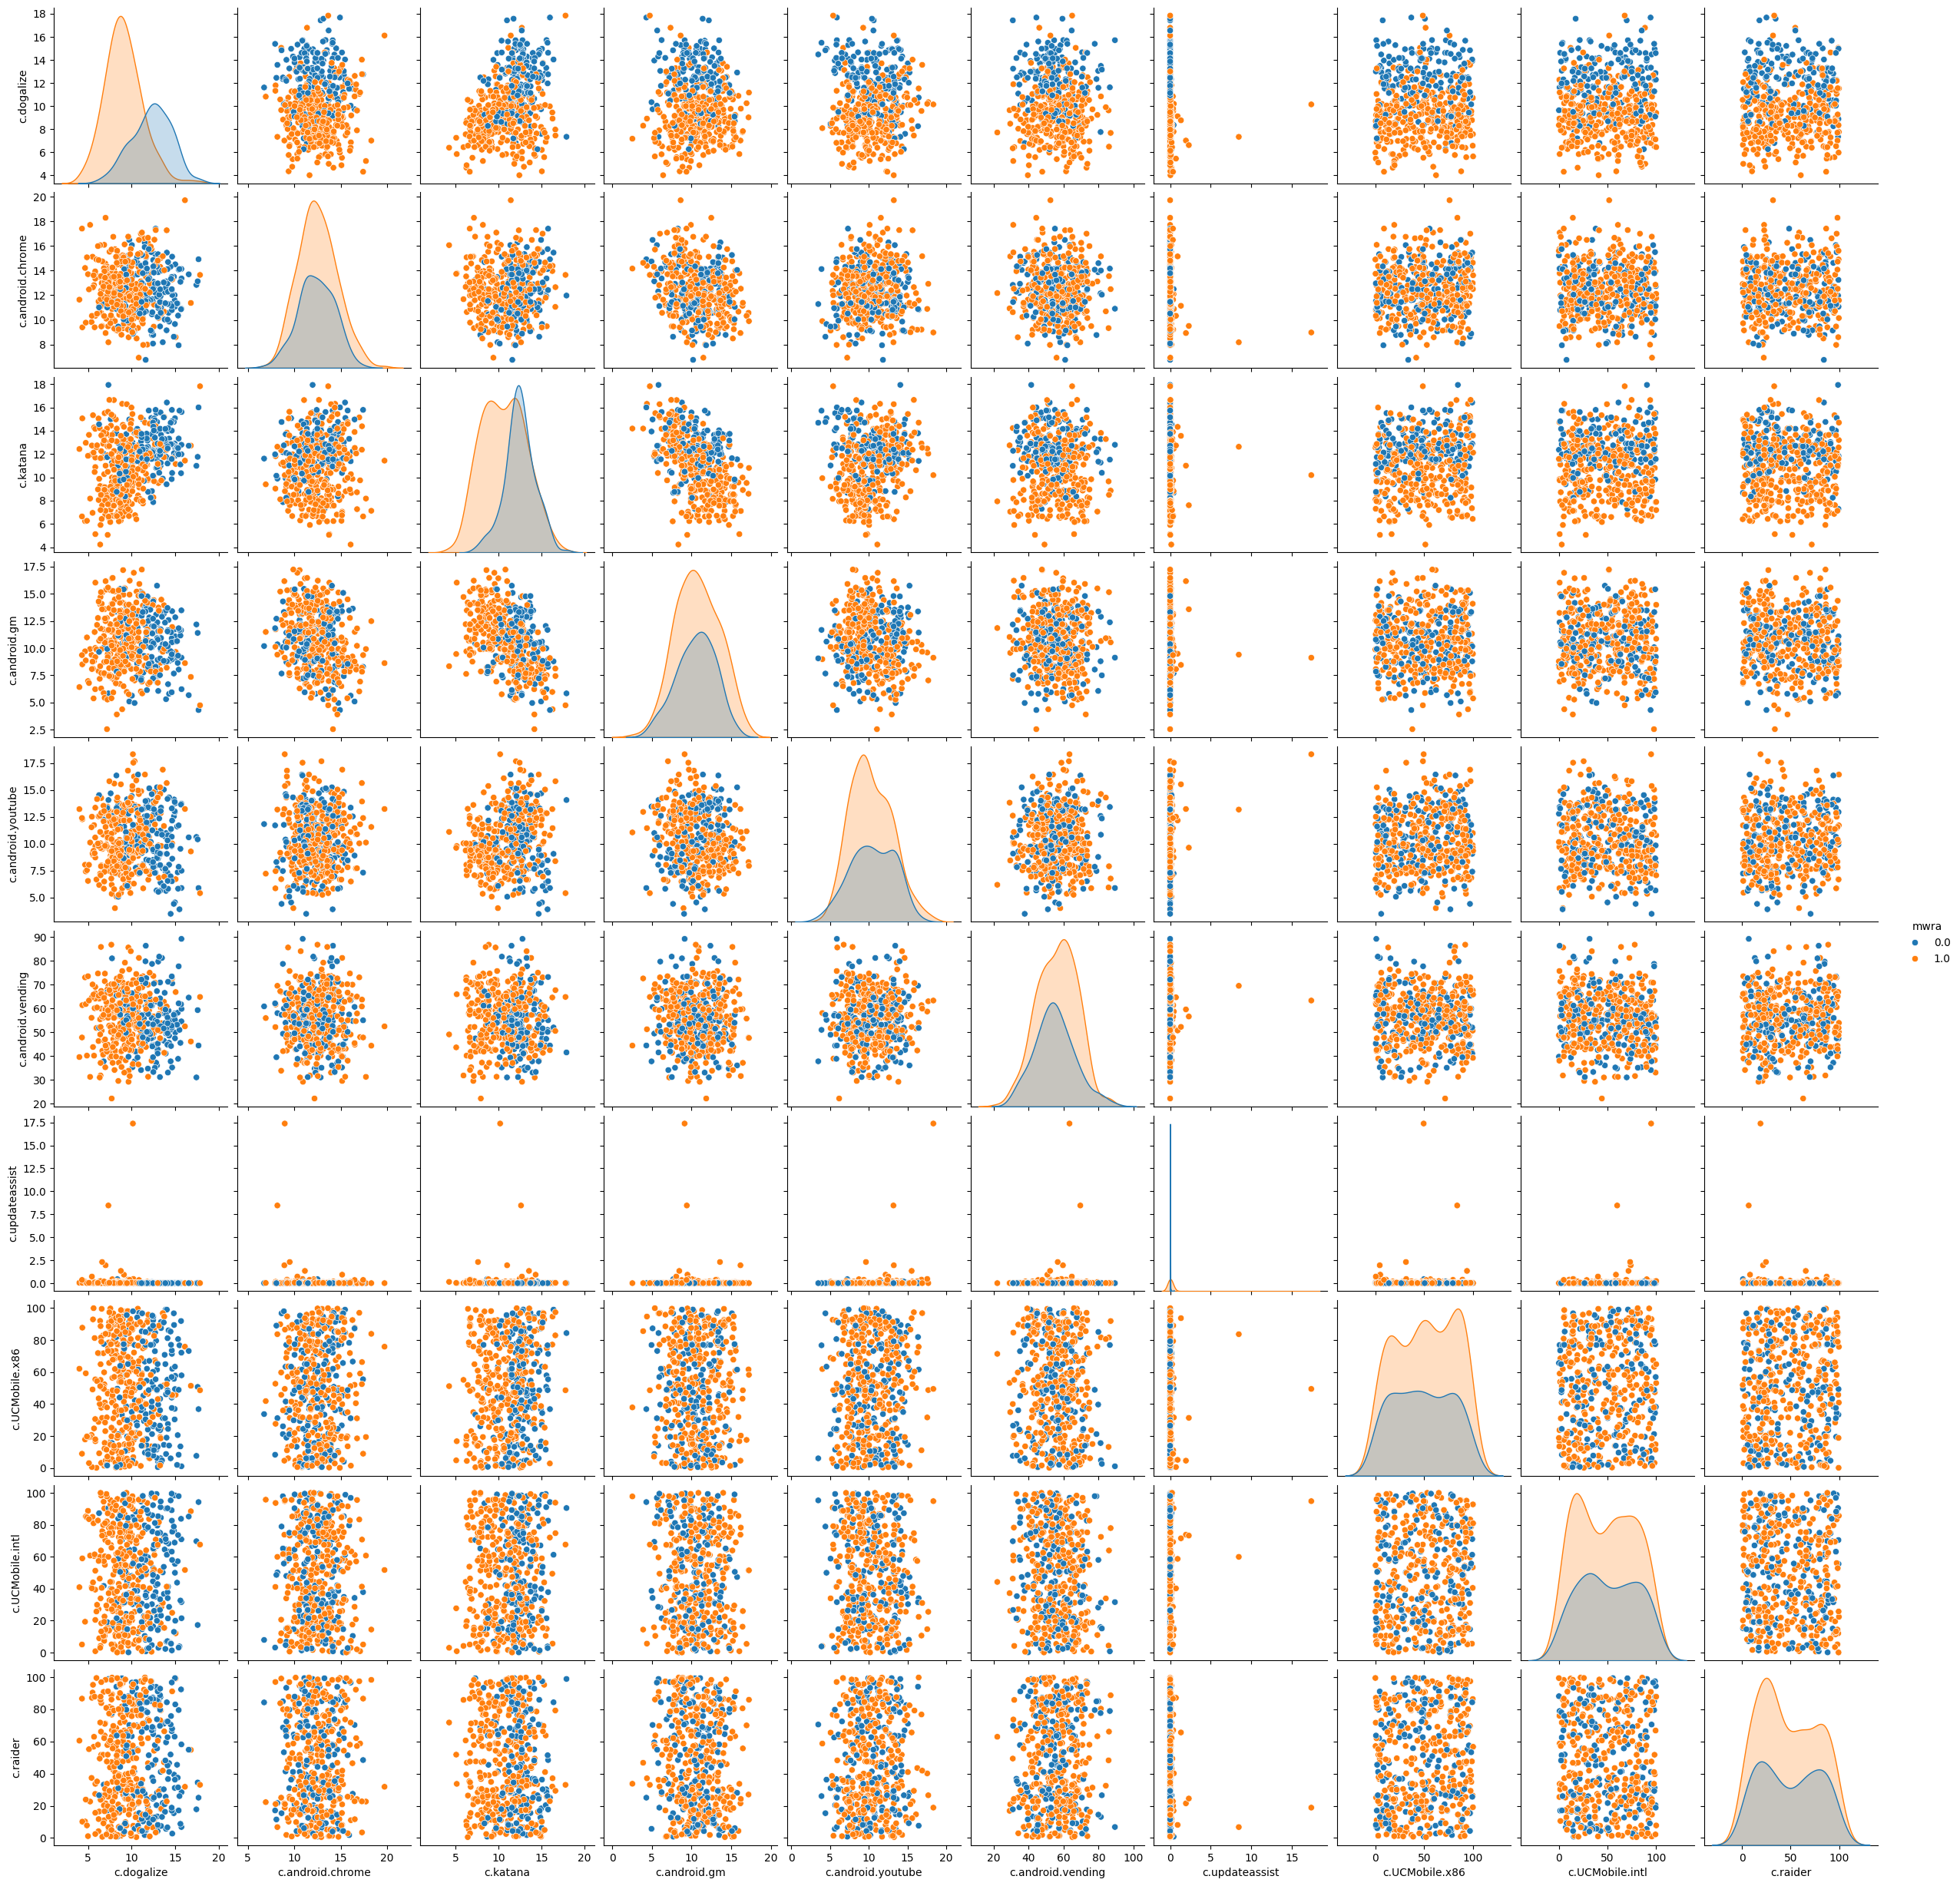

In [22]:
sns.pairplot(con2.head(500), hue='mwra')
plt.plot()

## E

# 1.1 summary
Data description:
- separator = \t
- header included everywhere
- row and columns count
- NA pocty


# 1.2 Identifikácia problémov, integrácia a čistenie dát

## A

### Columns name

In [23]:
# con.columns
# proc.columns
# dev.columns
# prof.columns

### Columns rename

In [24]:
con = con.rename(columns={  'ts':'DateTime',
                            'imei':'ID',
                            'mwra':'Malware',
                            'c.dogalize':'Dogalize',
                            'c.android.chrome':'Chrome',
                            'c.katana':'Katana',
                            'c.android.gm':'Gm',
                            'c.android.youtube':'Youtube',
                            'c.android.vending':'Vending',
                            'c.updateassist':'Update_Assist',
                            'c.UCMobile.x86':'UCMobile_x86',
                            'c.UCMobile.intl':'UCMobile_intl',
                            'c.raider':'Raider'})

proc = proc.rename(columns={'ts':'DateTime',
                            'imei':'ID',
                            'mwra':'Malware',
                            'p.android.packageinstaller':'Package_Installer',
                            'p.android.externalstorage':'External_Storage',
                            'p.system':'System',
                            'p.android.chrome':'Chrome',
                            'p.android.settings':'Settings',
                            'p.android.documentsui':'Document_Sui',
                            'p.android.gm':'Gm',
                            'p.katana':'Katana',
                            'p.google':'Google',
                            'p.android.gms':'Gms',
                            'p.inputmethod.latin':'InputMethod_Latin',
                            'p.process.gapps':'Process_Gapps',
                            'p.olauncher':'OLauncher',
                            'p.browser.provider':'Browser_Provider',
                            'p.notifier':'Notifier',
                            'p.gms.persistent':'Gms_Persistent',
                            'p.android.defcontainer':'Def_Container',
                            'p.android.vending':'Vending',
                            'p.simulator':'Simulator',
                            'p.dogalize':'Dogalize'})

dev = dev.rename(columns={  'latitude':'Width',
                            'longitude':'Length',
                            'store_name':'City',
                            'code':'Country',
                            'location':'Location',
                            'imei':'ID'})

prof = prof.rename(columns={'job':'Job',
                            'current_location':'Coordinates',
                            'imei':'ID',
                            'user_id':'UserID',
                            'address':'Adress',
                            'ssn':'SSN',
                            'company':'Company',
                            'birthdate':'Birthdate',
                            'registration':'Registration',
                            'mail':'Email',
                            'username':'Username',
                            'name':'Name'})

### Columns re-order

In [25]:
con = con[[   'ID', 'Malware', 'DateTime', 'Chrome',
        'Youtube', 'Dogalize', 'Katana', 'Raider', 'Gm',
        'Vending', 'Update_Assist', 'UCMobile_x86', 'UCMobile_intl']]

proc = proc[[  'ID', 'Malware', 'DateTime', 'Chrome',
        'Google', 'Dogalize', 'Katana', 'Gm',
        'Vending', 'System', 'Settings', 'Simulator',
        'Notifier', 'Gms', 'Gms_Persistent', 'Document_Sui',
        'Package_Installer', 'External_Storage', 'InputMethod_Latin',
        'Process_Gapps', 'OLauncher', 'Browser_Provider',   'Def_Container']]

dev = dev[['ID', 'Country', 'City', 'Location', 'Width', 'Length']]

prof = prof[[  'ID', 'UserID', 'Username', 'Name', 'Email', 'Birthdate',
        'Job', 'Adress', 'SSN', 'Company',  
        'Registration', 'Coordinates']]

### Columns type conversion

In [26]:
con['DateTime'] = pd.to_datetime(con['DateTime'])
con['Malware'] = con['Malware'].astype(int)

proc['DateTime'] = pd.to_datetime(proc['DateTime'])
proc['Malware'] = proc['Malware'].astype(int)

# dev['City'] = dev['City'].astype(str)
# dev['Country'] = dev['Country'].astype(str)
# dev['Location'] = dev['Location'].astype(str)

# prof['Job'] =  prof['Job'].astype(str)
##* prof['Coordinates']
# prof['Adress'] =  prof['Adress'].astype(str)
# prof['SSN'] =  prof['SSN'].astype(str)
# prof['Company'] =  prof['Company'].astype(str)
prof['Birthdate'] =  pd.to_datetime(prof['Birthdate'])

# Profiles Registration column CONVERSION
def convert_mixed_date(date_str):
    try:
        return pd.to_datetime(date_str)
    except:
        try:
            # (YYYY-MM-DD)
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except ValueError:
            try:
                # (MM/DD/YYYY, HH:MM:SS)
                return pd.to_datetime(date_str, format='%m/%d/%Y, %H:%M:%S')
            except ValueError:
                try:
                    # (07 Oct 2023)
                    return pd.to_datetime(date_str, format='%d %b %Y')
                except ValueError:
                    return pd.NaT

prof['Registration'] = prof['Registration'].apply(convert_mixed_date)
# prof['Email'] =  prof['Email'].astype(str)
# prof['UserName'] =  prof['UserName'].astype(str)
# prof['Name'] =  prof['Name'].astype(str)

### Missing values

In [27]:
# con.isna().sum() # 0
# proc.isna().sum() # 0
# dev.isna().sum() # Country: 1
prof.isna().sum()

ID                 0
UserID             0
Username           0
Name               0
Email              0
Birthdate       1133
Job             1762
Adress           378
SSN                0
Company            0
Registration       0
Coordinates      126
dtype: int64

### Duplicated rows

In [28]:
print(
    con.duplicated().sum(), proc.duplicated().sum(), dev.duplicated().sum(), prof.duplicated().sum()
)

180 180 6 0


### Duplicated rows - DELETED

In [29]:
print(
    "BEFORE:", con.shape[0], proc.shape[0], dev.shape[0], prof.shape[0]
)

BEFORE: 15163 15163 2983 2517


In [30]:
con = con.loc[~con.duplicated()].reset_index(drop=True).copy()
proc = proc.loc[~proc.duplicated()].reset_index(drop=True).copy()
dev = dev.loc[~dev.duplicated()].reset_index(drop=True).copy()

In [31]:
print(
    "AFTER:", con.shape[0], proc.shape[0], dev.shape[0], prof.shape[0]
)

AFTER: 14983 14983 2977 2517


## B

In [32]:
prof.isna().sum()

ID                 0
UserID             0
Username           0
Name               0
Email              0
Birthdate       1133
Job             1762
Adress           378
SSN                0
Company            0
Registration       0
Coordinates      126
dtype: int64

In [33]:
# prof['Birthdate'] = prof['Birthdate'].fillna('not included')
# prof['Birthdate'] = prof['Birthdate'].replace('not included', pd.NaT)

In [36]:
con.loc[con['ID'].isnull()]

Empty DataFrame
Columns: [ID, Malware, DateTime, Chrome, Youtube, Dogalize, Katana, Raider, Gm, Vending, Update_Assist, UCMobile_x86, UCMobile_intl]
Index: []

# 1.3 Formulácia a štatistické overenie hypotéz o dátach

## A

## B

# EXTRA

In [21]:
con.to_csv('dataset82_edited/Connections.csv', index=False)
proc.to_csv('dataset82_edited/Processes.csv', index=False)
dev.to_csv('dataset82_edited/Devices.csv', index=False)
prof.to_csv('dataset82_edited/Profiles.csv', index=False)